<a href="https://colab.research.google.com/github/AleGdSantos/AleGdSantos/blob/main/I2A2_An%C3%A1lise_de_falhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I2A2:ANÁLISE DE FALHAS**

***Descrição:***

O propósito deste projeto é realizar uma análise de um conjunto de leituras, permitindo, desse modo, a identificação e classificação de anomalias.

***Objetivo:***

Descobrir qual Objeto está apresentando defeito.


**Regras do Jogo**

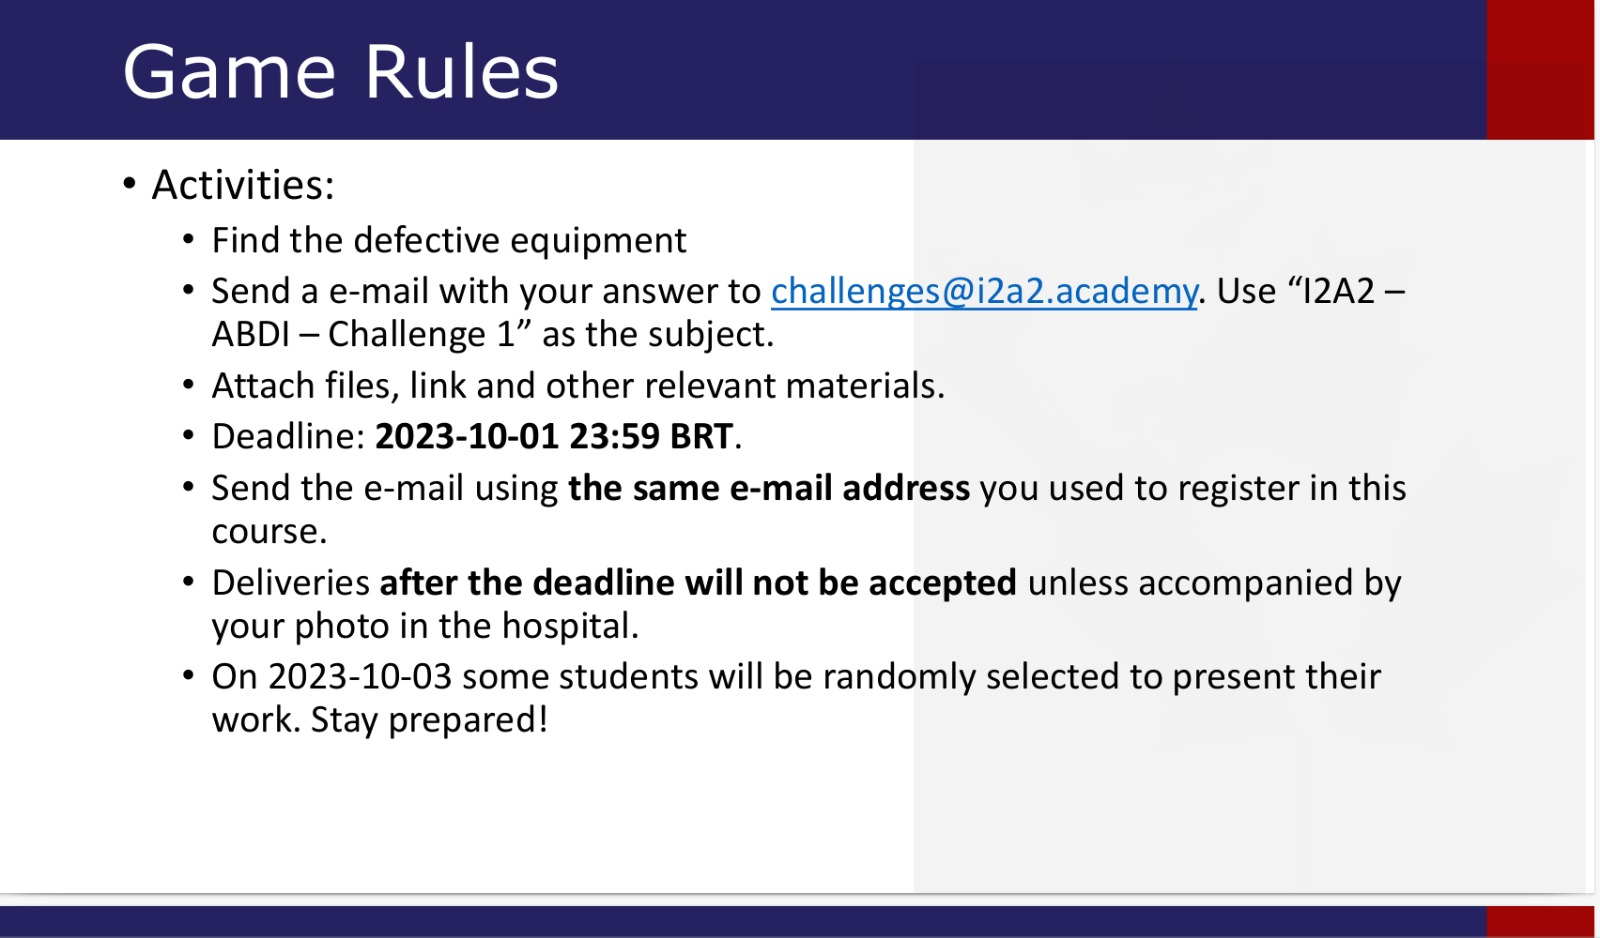

# Legenda dos Dados

df - dataFrame

df2 - Copia do dataFrame original

vetores - valores de df2 tranfomados em vetor

previsores_esc - Normaliza os valores de df2

previsoresdf - Dataset com os valores normalizados

vetores_norm - Vetores com os valores normalizados

principalDf - Dataset com os componentes principais

#Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px

#Importar Dados

In [ ]:
#Cria um ambiente com o Drive
from google.colab import files# importa arquivos do computador para o colab
uploaded = files.upload()

Saving teste_vetor.xlsx to teste_vetor.xlsx


In [ ]:
#Cria um dataframe com os dados da planilha
df = pd.DataFrame(pd.read_excel('teste_vetor.xlsx'))

# Exploração dos Dados

In [ ]:
#Verifica as colunas existentes no dataset
df.columns

Index(['ID', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='object')

In [ ]:
#Verificando a quantidade de linhas e colunas
df.shape

(4, 18)

In [ ]:
#Verifica as 5 primeiras linhas
df.head()

,ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,ENG,375,57,245,1472,105,54,193,147,102,720,253,685,488,198,360,1374,156
1,N IRELAND,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
2,SCOTLAND,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,174
3,WALES,475,73,227,1582,103,64,235,160,137,874,265,803,570,203,365,1256,175




Para esta etapa iremos realizar a **Transposição dos dados**, uma técnica eficiente para quando se deseja transformar as colunas em linha, dando assim uma perspectiva diferente dos dados.

In [ ]:
#Remove a coluna Sensor
#Transposição dos dados e resetar os indices
df = df.drop("Sensor", axis = 1)
df = df.T.reset_index()
#df = df.drop("index", axis = 1)
df.head()

KeyError: ignored

Com a tranposição já é possível identificar alguns possíveis candidatos, como os objetos **Obj2** e **Obj4**, que apresentam uma série de valores discrepantes em relação ao comportamento padrão. No entanto, para obtermos uma conclusão mais robusta, é necessário realizar uma análise mais aprofundada desses dados

In [ ]:
#Verificando a quantidade de linhas e colunas após a tranposição
df.shape

(4, 18)

In [ ]:
# Resumo estatístico dos dados
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,4.000000,4.000000,4.00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,360.750000,57.500000,245.25,1502.500000,94.250000,55.250000,205.250000,130.500000,467.500000,798.250000,208.000000,706.000000,457.750000,202.000000,349.000000,1427.000000,161.000000
std,156.712848,11.120552,16.50,54.659552,18.856917,10.436315,22.366269,29.557853,418.359096,200.755863,60.188592,93.427334,92.471167,13.735599,15.769168,140.612944,17.068489
min,135.000000,47.000000,227.00,1462.000000,66.000000,41.000000,184.000000,93.000000,102.000000,566.000000,143.000000,586.000000,355.000000,187.000000,334.000000,1256.000000,139.000000
25%,315.000000,51.500000,238.25,1469.500000,93.750000,50.750000,190.750000,114.750000,128.250000,681.500000,164.000000,660.250000,402.250000,195.250000,336.250000,1344.500000,151.750000
50%,416.500000,55.000000,243.50,1483.000000,103.000000,58.000000,201.000000,134.500000,405.500000,797.000000,212.000000,717.500000,453.000000,200.500000,348.500000,1440.000000,165.000000
75%,462.250000,61.000000,250.50,1516.000000,103.500000,62.500000,215.500000,150.250000,744.750000,913.750000,256.000000,763.250000,508.500000,207.250000,361.250000,1522.500000,174.250000
max,475.000000,73.000000,267.00,1582.000000,105.000000,64.000000,235.000000,160.000000,957.000000,1033.000000,265.000000,803.000000,570.000000,220.000000,365.000000,1572.000000,175.000000


Com base na mediana e no desvio padrão, identificamos que alguns valores estão discrepantes em relação ao esperado, o que pode servir como um sólido ponto de partida para nossa análise.

Para as etapas seguintes, faremos uso de uma cópia do DataFrame, a fim de evitar modificações diretas no conjunto de dados original.

In [ ]:
df2 = df.copy()

Também iremos trocar o nome das colunas para facilitar a aplicação em gráficos e outras funções.

In [ ]:
df2 = df2.rename(columns={ "ID":"PAIS",0: "sensor_0", 1: "sensor_1", 2: "sensor_2", 3: "sensor_3", 4: "sensor_4", 5: "sensor_5",
                           6: "sensor_6", 7: "sensor_7", 8: "sensor_8", 9: "sensor_9", 10: "sensor_10", 11: "sensor_11",
                           12: "sensor_12", 13: "sensor_13", 14: "sensor_14", 15: "sensor_15", 16: "sensor_16",17: "sensor_17"})

In [ ]:
# Verificandos todas as linhas do dataframe para garantir que nada de importante foi perdido ou alterado
df2.head(10)

,PAIS,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17
0,ENG,375,57,245,1472,105,54,193,147,102,720,253,685,488,198,360,1374,156
1,N IRELAND,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
2,SCOTLAND,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,174
3,WALES,475,73,227,1582,103,64,235,160,137,874,265,803,570,203,365,1256,175


In [ ]:
# Verficando valores únicos
df2.nunique()

PAIS         4
sensor_1     4
sensor_2     4
sensor_3     4
sensor_4     4
sensor_5     3
sensor_6     4
sensor_7     4
sensor_8     4
sensor_9     4
sensor_10    4
sensor_11    4
sensor_12    4
sensor_13    4
sensor_14    4
sensor_15    4
sensor_16    4
sensor_17    4
dtype: int64

In [ ]:
# Verificando valores nulos
df2.isnull().sum()

PAIS         0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
dtype: int64

In [ ]:
# Verificando de forma geral
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PAIS       4 non-null      object
 1   sensor_1   4 non-null      int64 
 2   sensor_2   4 non-null      int64 
 3   sensor_3   4 non-null      int64 
 4   sensor_4   4 non-null      int64 
 5   sensor_5   4 non-null      int64 
 6   sensor_6   4 non-null      int64 
 7   sensor_7   4 non-null      int64 
 8   sensor_8   4 non-null      int64 
 9   sensor_9   4 non-null      int64 
 10  sensor_10  4 non-null      int64 
 11  sensor_11  4 non-null      int64 
 12  sensor_12  4 non-null      int64 
 13  sensor_13  4 non-null      int64 
 14  sensor_14  4 non-null      int64 
 15  sensor_15  4 non-null      int64 
 16  sensor_16  4 non-null      int64 
 17  sensor_17  4 non-null      int64 
dtypes: int64(17), object(1)
memory usage: 704.0+ bytes


## Gráficos

A seguir iremos explorar a distribuição dos dados com base em alguns gráficos simples.

**Histograma:** é uma representação gráfica que mostra a distribuição de frequência de um conjunto de dados. Ele divide os dados em intervalos ou bins e exibe quantos valores estão dentro de cada intervalo. Isso permite visualizar a forma da distribuição dos dados, identificar tendências, padrões e outliers, além de avaliar a concentração de valores em diferentes faixas.

In [ ]:
# Verificando as colunas existentes
df2.columns

Index(['PAIS', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17'],
      dtype='object')

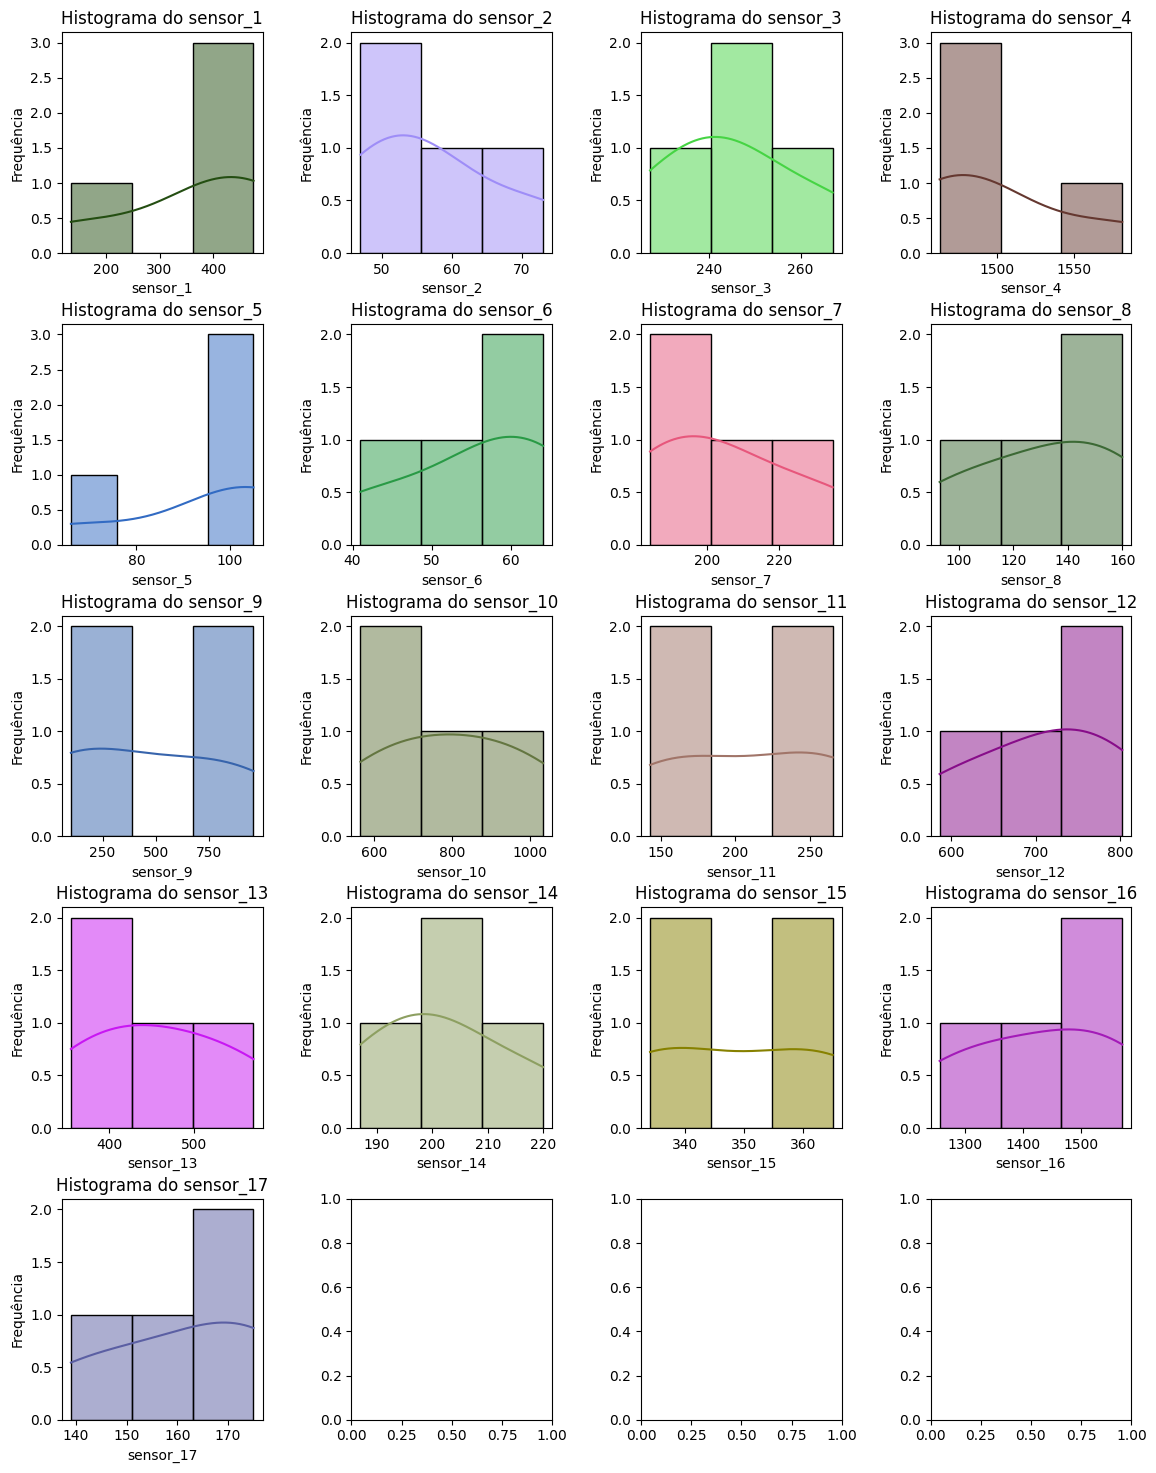

In [ ]:
sensores = df2.columns[1:]  # Exclui a primeira coluna ("Obj") e obtém todas as colunas de sensores

# Gera cores aleatórias para os sensores
import random
cores = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(sensores))]

# Cria uma figura com subplots
num_linhas = (len(sensores) - 1) // 4 + 1  # Calcula o número de linhas com base no número de sensores
fig, axs = plt.subplots(num_linhas, 4, figsize=(12, 3 * num_linhas))
fig.tight_layout(pad=3.0)

# Itera pelos sensores e cria um histograma para cada um deles com cores diferentes
for i, sensor_coluna in enumerate(sensores):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    sns.histplot(data=df2, x=sensor_coluna, kde=True, color=cores[i], ax=ax)
    ax.set_title(f'Histograma do {sensor_coluna}')
    ax.set_xlabel(sensor_coluna)
    ax.set_ylabel('Frequência')

# Exibe os gráficos
plt.show()


**Boxplot:** também conhecido como diagrama de caixa, ou gráfico de bigode, é uma representação gráfica que fornece uma visão resumida e visual da distribuição de um conjunto de dados. Ele é composto por um retângulo (a "caixa") que representa o **intervalo interquartil (IQR)**, ou seja, a faixa que contém a maioria dos dados, e duas linhas que se estendem a partir da caixa, indicando a variação total dos dados.

A linha central representa a mediana (o valor do meio dos dados), e os lados da caixa indicam o primeiro quartil (**25%**) e o terceiro quartil (**75%**).

As linhas superior e inferior se estendem até os valores mínimos e máximos dentro de um limite específico, geralmente **1,5 vezes o IQR **a partir dos quartis.

O boxplot também pode mostrar **outliers**, que são valores incomuns ou extremos nos dados, representados como pontos individuais.

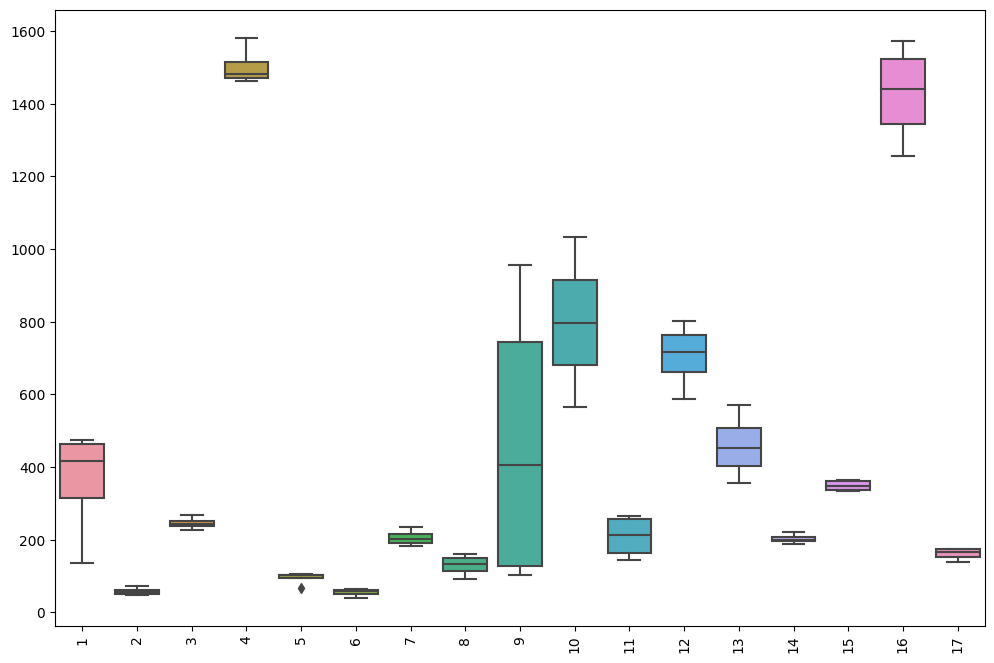

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
#plt.savefig('C:\\Users\\alessandra.santos\\Desktop\\AM\\receitas\\PHOTO\\R430_bigod.png')
plt.xticks(rotation=90)
#plt.savefig('C:\\Users\\alessandra.santos\\Desktop\\AM\\receitas\\PHOTO\\R430_bigod.png')
plt.show()

**Observações:**
* Várias colunas contêm valores atípicos, sendo que a Coluna 3 e a Coluna 9 se destacam nesse aspecto.;
* Os dados exibem unidades e escalas distintas, tornando a comparação direta mais desafiadora.



**Conclusão:**

A partir da análise do gráfico boxplot, observamos a presença de valores atípicos em várias colunas, sugerindo que esses pontos merecem nossa atenção inicial na análise. No entanto, dado o nosso conhecimento limitado sobre o comportamento típico dos objetos, é importante ressaltar que essa inferência por si só não é suficiente para identificar com precisão quais objetos estão com defeito.

#Análise 1: Distância e Dissimilaridade

##Justificativa

**Descrição:**

Como primeira etapa da análise, procederemos à transformação dos dados em vetores, permitindo-nos, assim, calcular a distância e a dissimilaridade entre eles.

Os cálculos de distância e dissimilaridade ajudam a definir qual vetor representa um componente defeituoso, comparando a semelhança entre vetores. Quanto maior a distância ou dissimilaridade entre um vetor de componente e os vetores normais (sem defeito), maior a probabilidade de ele representar um componente defeituoso. Essas métricas são usadas para identificar discrepâncias nos dados e destacar componentes que se afastam do comportamento típico, o que pode indicar defeitos ou anomalias. Portanto, vetores com maiores valores de distância ou dissimilaridade são suspeitos de representar componentes defeituosos.

***Para esta análise utilizaremos os cálculoas a seguir:***


**Distância Euclidiana:** Calcula a distância linear mais curta entre dois pontos. É útil para medir a proximidade direta entre os dados. Quanto **menor a distância Euclidiana, mais similares são os pontos**.

**Distância de Chebyshev:** Esta medida considera apenas a maior diferença entre as coordenadas dos pontos ao longo de qualquer dimensão. É útil para identificar a **maior discrepância** entre os dados em qualquer direção.

**Distância de Minkowski:** É uma medida generalizada que **engloba tanto a distância Euclidiana quanto a distância de Chebyshev **como casos especiais. O parâmetro "p" na fórmula da distância de Minkowski permite ajustar a sensibilidade às diferentes dimensões dos dados. Quando p=2, é equivalente à distância Euclidiana; quando p=∞, é equivalente à distância de Chebyshev.

**Distância Manhattan**: mede a distância entre dois pontos em um espaço bidimensional, considerando apenas **deslocamentos horizontais e verticais**, sem levar em conta deslocamentos diagonais. É frequentemente usada em problemas de otimização, planejamento de rotas, análise de imagens e muito mais.

**Distância de Canberra:** Leva em consideração a diferença relativa entre os pontos em cada dimensão. É especialmente** útil quando os dados têm diferentes escalas e unidades**, pois reduz o impacto de grandes diferenças em uma dimensão.

**Similaridade do Cosseno:** Em vez de medir a distância, a similaridade do cosseno mede o ângulo entre dois vetores de dados. Quanto mais próximos os vetores estão de formar um **ângulo de 0 graus** (ou seja, são paralelos), **maior é a similaridade do cosseno**. Isso é frequentemente usado em análise de texto ou quando a magnitude dos vetores não é relevante.



##Resultados
Para esta etapa faremos:


1.   Transformação das linhas do dataframe em vetores
2.   Utilizaremos a biblioteca SCIPY que contém os cálculos euclidean, chebyshev, minkowski, canberra, cosine.
3.   Adicionaremos a mão o cálculo de manhattan
4.   Calcularemos a distância média entre cada vetor para evidenciar o vetor com maior discrepância.

In [ ]:
# Tranformando os valores do dataframe em vetores
vetores = df2.drop('PAIS', axis=1)
vetores = vetores.to_numpy()

In [ ]:
from scipy.spatial.distance import euclidean, chebyshev, minkowski, canberra, cosine

# Calcular as distâncias médias para cada vetor usando diferentes métricas de distância
distancias_euclidiana = [np.mean([euclidean(v, w) for w in vetores]) for v in vetores]
distancias_manhattan = [np.mean([np.sum(np.abs(v - w)) for w in vetores]) for v in vetores]
distancias_chebyshev = [np.mean([chebyshev(v, w) for w in vetores]) for v in vetores]
distancias_minkowski = [np.mean([minkowski(v, w, 2) for w in vetores]) for v in vetores]
distancias_canberra = [np.mean([canberra(v, w) for w in vetores]) for v in vetores]
distancias_cosseno = [np.mean([1 - cosine(v, w) for w in vetores]) for v in vetores]

# Calcular a média das distâncias de cada métrica para cada vetor
distancias_medias = np.mean([distancias_euclidiana, distancias_manhattan, distancias_chebyshev,
                             distancias_minkowski, distancias_canberra, distancias_cosseno], axis=0)

# Encontra o vetor com a maior distância média
indice_maior_distancia = np.argmax(distancias_medias)

# Imprime o vetor com a maior distância média
vetor_maior_distancia = vetores[indice_maior_distancia]
print("Vetor com a maior distância média em relação aos outros:")
print(vetor_maior_distancia)
# Imprime o Obj com maior chance de estar com defeito
obj = df2['PAIS'][indice_maior_distancia]
print("O objeto maior probabilidade de estar com defeito:")
print(obj)

Vetor com a maior distância média em relação aos outros:
[ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
  337 1572  174]
O objeto maior probabilidade de estar com defeito:
SCOTLAND


**Conclusão:** Com base nas métricas apresentadas, o objeto com maior chance de estar defeituoso é o Obj2.

## Análise Gráfica

Nesta etapa estamos avaliando o comportamento dos vetores através de gráficos simples

**Gráfico de Linha**

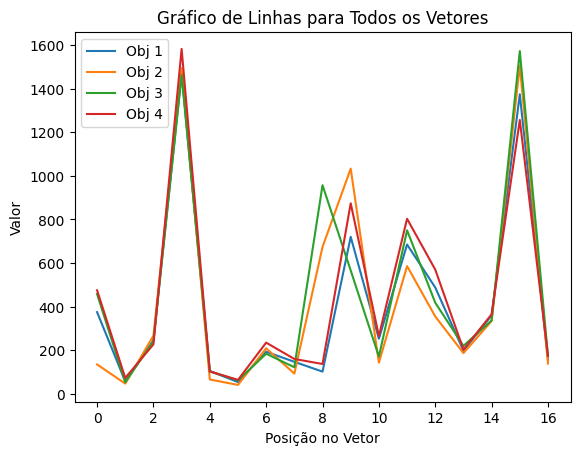

In [ ]:
# Cria um array de índices para representar as posições dos valores no vetor
indices = range(len(vetores[0]))

# Crie o gráfico de linhas para cada vetor com rótulos de legenda
for i, vetor in enumerate(vetores):
    plt.plot(indices, vetor, label=f'Obj {i + 1}')

# Configure os rótulos dos eixos
plt.xlabel('Posição no Vetor')
plt.ylabel('Valor')
plt.title('Gráfico de Linhas para Todos os Vetores')
plt.legend()

# Exiba o gráfico
plt.show()

**Conclusão:** A análise dos gráficos de linha indica que o Objeto 2 apresenta um comportamento claramente distinto em relação aos demais. Além disso, os Objetos 3 e 6 também se destacam como possíveis candidatos a comportamentos anômalos.

**Scatterplot e Pairplot**

**Scatterplot:** gráfico bidimensional que exibe os valores de duas variáveis em um espaço de coordenadas cartesianas. Cada ponto no gráfico representa uma observação individual.

**Para que serve:** visualizar a relação entre duas variáveis contínuas, permitindo identificar a presença de padrões, tendências, agrupamentos, dispersões ou até mesmo outliers. Ele é útil para entender se há uma correlação entre as variáveis, se elas têm uma relação linear ou não, e como uma variável se comporta em relação à outra.

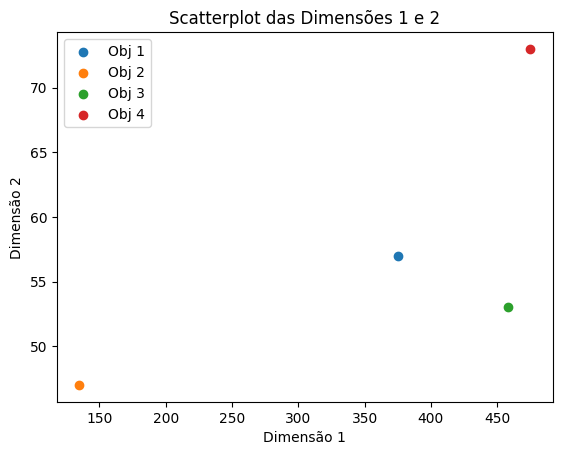

In [ ]:
# Escolha duas dimensões para o scatterplot (por exemplo, dimensão 1 e dimensão 2)
dimensao1 = 0  # Escolha a dimensão 1 (índice da coluna)
dimensao2 = 1  # Escolha a dimensão 2 (índice da coluna)

# Cria o scatterplot e adicione uma legenda
for i, vetor in enumerate(vetores):
    plt.scatter(vetor[dimensao1], vetor[dimensao2], label=f'Obj {i + 1}')

# Configura os rótulos dos eixos
plt.xlabel(f'Dimensão {dimensao1 + 1}')
plt.ylabel(f'Dimensão {dimensao2 + 1}')
plt.title(f'Scatterplot das Dimensões {dimensao1 + 1} e {dimensao2 + 1}')
# Adiciona a legenda
plt.legend()

# Exibe o scatterplot
plt.show()

**Pairplot:** é uma matriz de scatterplots que exibe todas as combinações possíveis de pares de variáveis em um conjunto de dados. Ele mostra scatterplots nas diagonais para representar as distribuições univariadas (apresentados anteriormente nos histogramas) de cada variável.

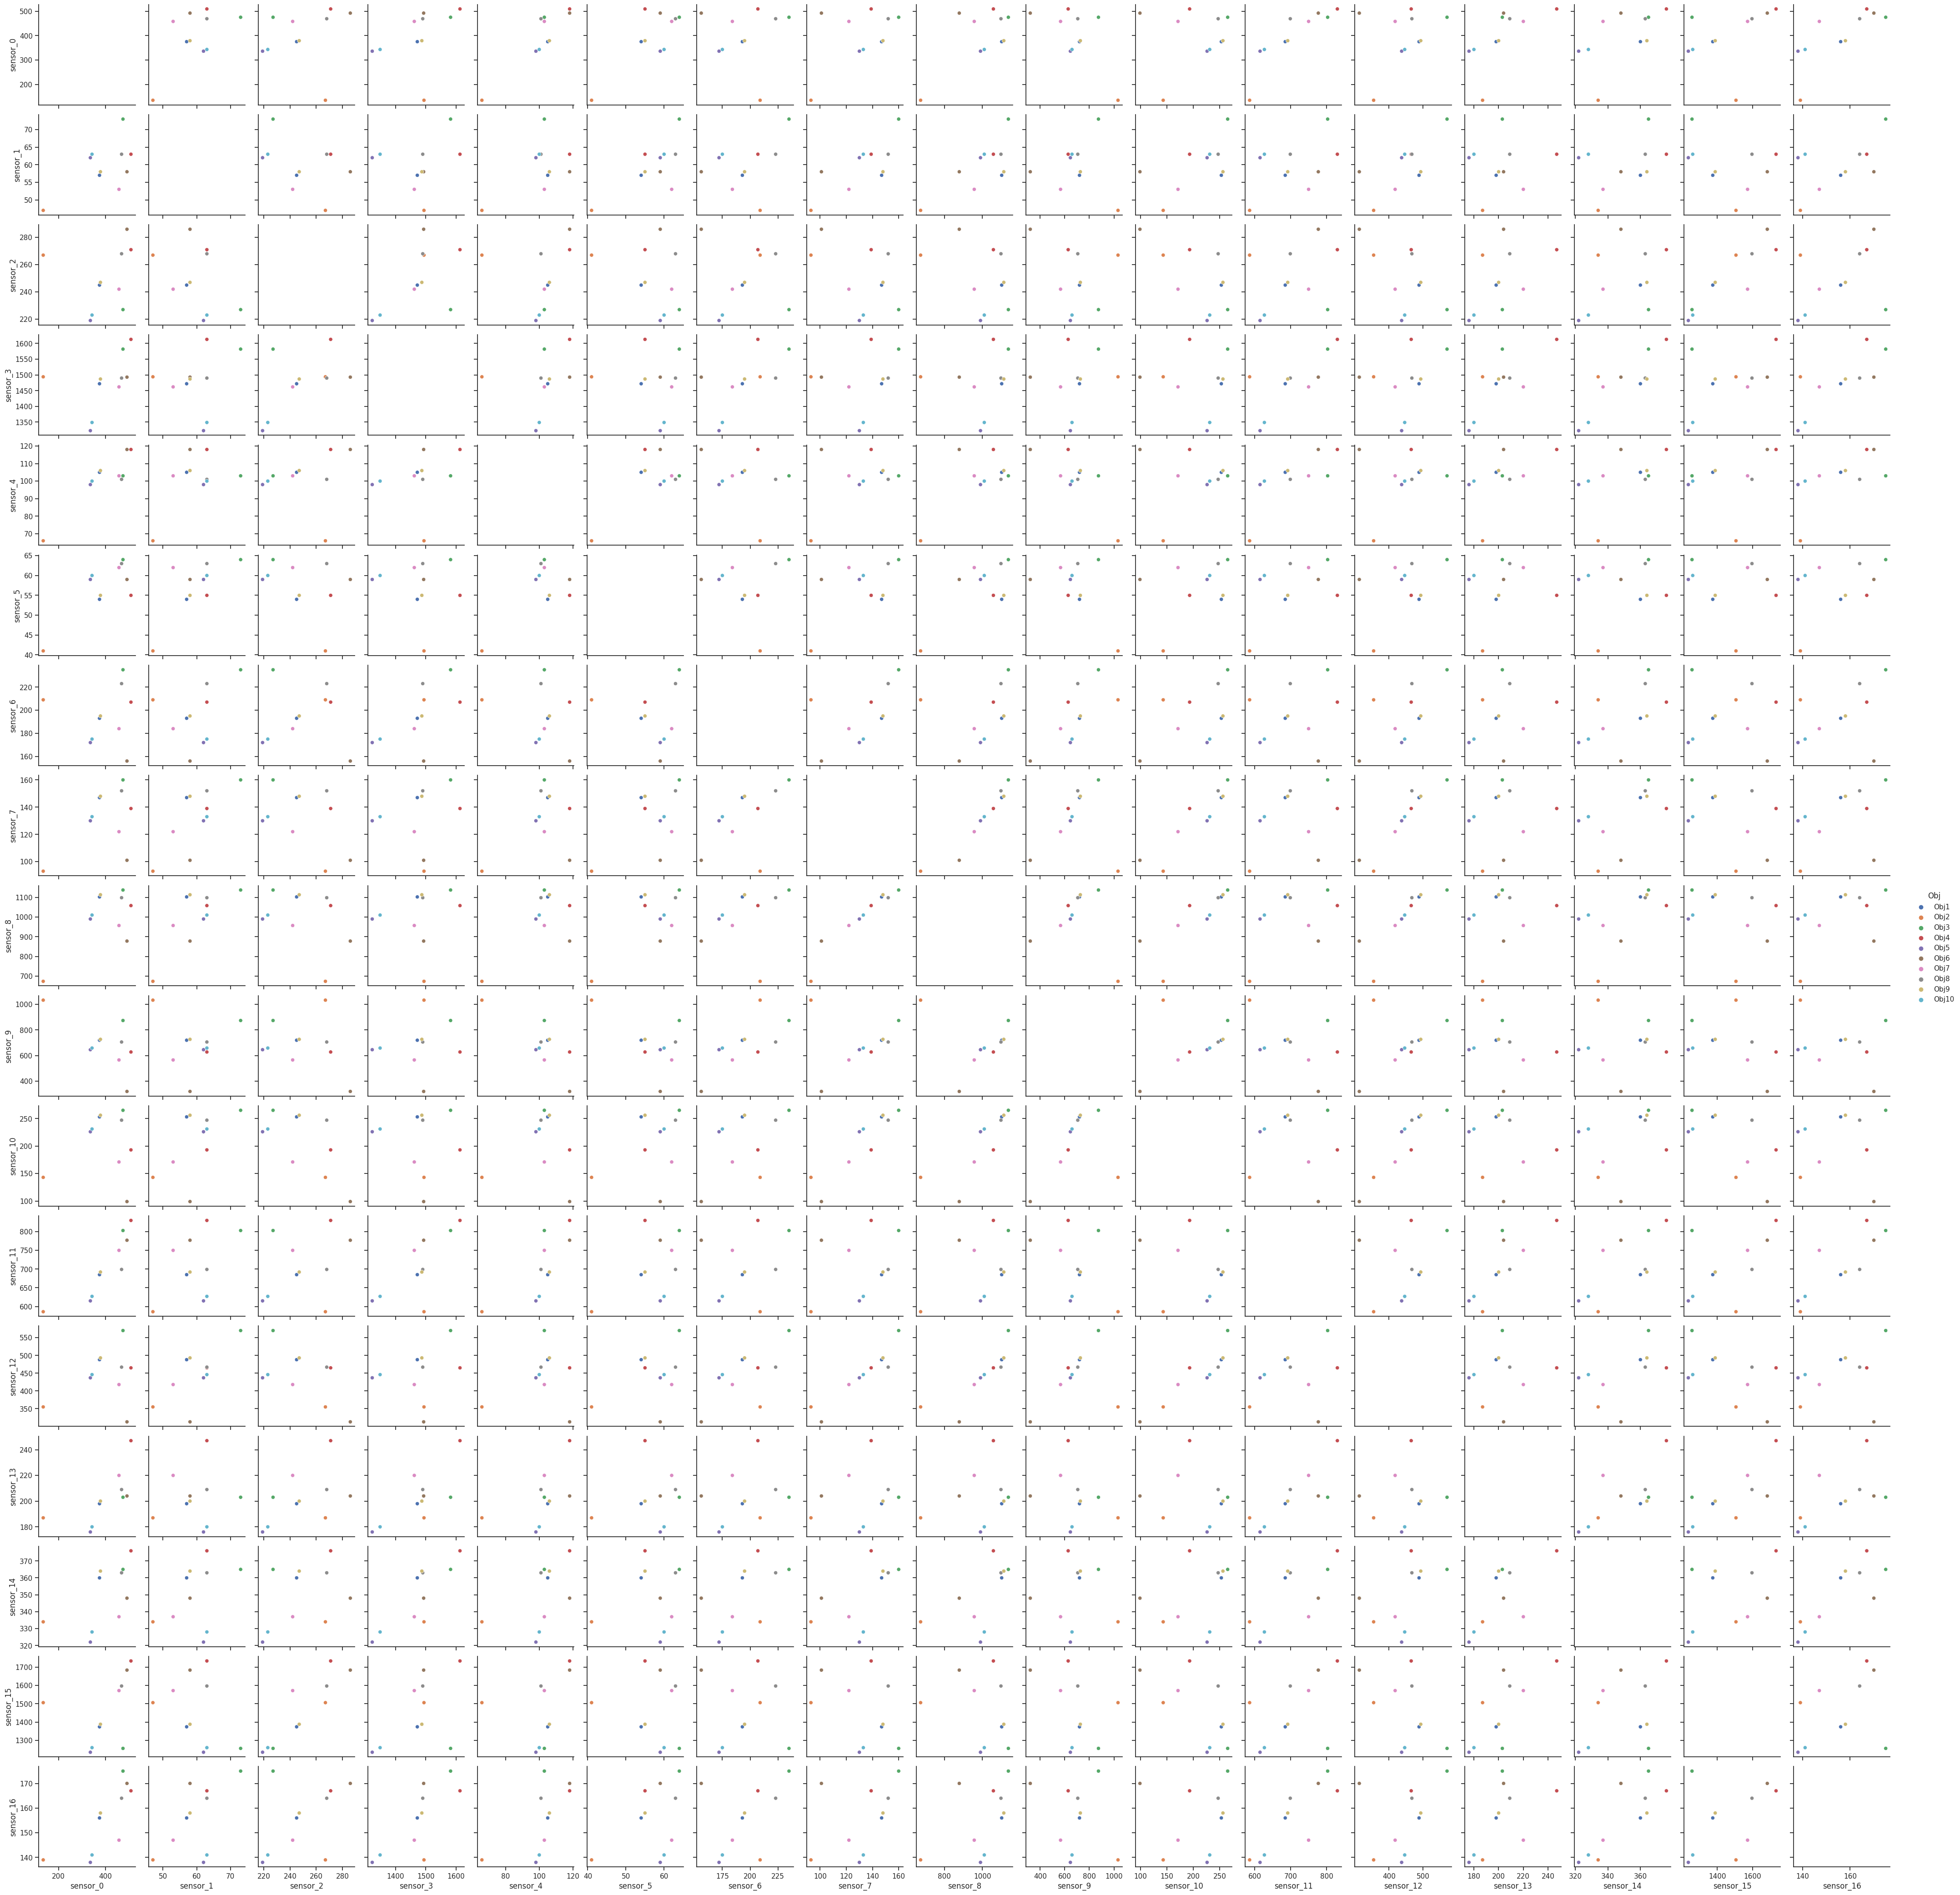

In [ ]:
#Pairplot - buscando tendência par a par
sns.pairplot(df2,kind='scatter', hue = 'Obj')
plt.show()

**Conclusão:** Com base nessas duas representação, podemos dizer que dentre todos os objetos há sempre um que fica muito divergente dos demais, no caso, o **OBJ2**.

#Normalização dos dados

Para esta etapa iremos aplicar a normalização dos dados colocando as variáveis em uma escala comum, entre 0 e 1, de modo que as características tenham uma distribuição uniforme e sejam comparáveis.

In [ ]:
from sklearn.preprocessing import StandardScaler # Padronização, todos os valore irão variar entre 0 e 1

In [ ]:
#Coloca apenas os valores das colunas em uma variável a parte
X = df2.iloc[:, 1:17].values

In [ ]:
# Verifica a variável X
X

array([[ 375,   57,  245, 1472,  105,   54,  193,  147,  102,  720,  253,
         685,  488,  198,  360, 1374],
       [ 135,   47,  267, 1494,   66,   41,  209,   93,  674, 1033,  143,
         586,  355,  187,  334, 1506],
       [ 458,   53,  242, 1462,  103,   62,  184,  122,  957,  566,  171,
         750,  418,  220,  337, 1572],
       [ 475,   73,  227, 1582,  103,   64,  235,  160,  137,  874,  265,
         803,  570,  203,  365, 1256]])

In [ ]:
# Cria uma nova variável com os valores transformados
previsores_esc = StandardScaler().fit_transform(X)

In [ ]:
previsores_esc

array([[ 0.10499766, -0.05191741, -0.01749546, -0.64432226,  0.65827466,
        -0.13830319, -0.63242919,  0.64458535, -1.00880571, -0.45007561,
         0.86331183, -0.25954622,  0.37773603, -0.33626508,  0.80547723,
        -0.43523112],
       [-1.66338402, -1.09026568,  1.52210526, -0.17956522, -1.72988456,
        -1.57665641,  0.19360077, -1.4649667 ,  0.56995453,  1.35022682,
        -1.24700598, -1.48312126, -1.28305378, -1.26099406, -1.09837804,
         0.64874072],
       [ 0.71656299, -0.46725672, -0.22744102, -0.85557546,  0.53580495,
         0.74683725, -1.09707105, -0.33205912,  1.35105444, -1.33584741,
        -0.70983418,  0.54381113, -0.49636387,  1.51319287, -0.87870243,
         1.19072664],
       [ 0.84182336,  1.60943981, -1.27716878,  1.67946294,  0.53580495,
         0.96812236,  1.53589947,  1.15244047, -0.91220325,  0.43569619,
         1.09352832,  1.19885635,  1.40168163,  0.08406627,  1.17160324,
        -1.40423624]])

In [ ]:
# coloca os valores transformados em um DF
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.104998,-0.051917,-0.017495,-0.644322,0.658275,-0.138303,-0.632429,0.644585,-1.008806,-0.450076,0.863312,-0.259546,0.377736,-0.336265,0.805477,-0.435231
1,-1.663384,-1.090266,1.522105,-0.179565,-1.729885,-1.576656,0.193601,-1.464967,0.569955,1.350227,-1.247006,-1.483121,-1.283054,-1.260994,-1.098378,0.648741
2,0.716563,-0.467257,-0.227441,-0.855575,0.535805,0.746837,-1.097071,-0.332059,1.351054,-1.335847,-0.709834,0.543811,-0.496364,1.513193,-0.878702,1.190727
3,0.841823,1.609440,-1.277169,1.679463,0.535805,0.968122,1.535899,1.152440,-0.912203,0.435696,1.093528,1.198856,1.401682,0.084066,1.171603,-1.404236


In [ ]:
# Verifica o resumo estatístico
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000
mean,0.000000,-5.551115e-17,5.551115e-17,0.000000,0.000000,0.000000,0.000000,0.000000,-2.775558e-17,-2.775558e-17,5.551115e-17,0.000000,0.000000,-1.387779e-17,-5.551115e-17,0.000000
std,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701
min,-1.663384,-1.090266e+00,-1.277169e+00,-0.855575,-1.729885,-1.576656,-1.097071,-1.464967,-1.008806e+00,-1.335847e+00,-1.247006e+00,-1.483121,-1.283054,-1.260994e+00,-1.098378e+00,-1.404236
25%,-0.337098,-6.230090e-01,-4.898730e-01,-0.697136,-0.030617,-0.497891,-0.748590,-0.615286,-9.363539e-01,-6.715186e-01,-8.441271e-01,-0.565440,-0.693036,-5.674473e-01,-9.336213e-01,-0.677482
50%,0.410780,-2.595871e-01,-1.224682e-01,-0.411944,0.535805,0.304267,-0.219414,0.156263,-1.711244e-01,-7.189706e-03,7.673883e-02,0.142132,-0.059314,-1.260994e-01,-3.661260e-02,0.106755
75%,0.747878,3.634219e-01,3.674047e-01,0.285192,0.566422,0.802159,0.529175,0.771549,7.652295e-01,6.643289e-01,9.208660e-01,0.707572,0.633722,4.413479e-01,8.970087e-01,0.784237
max,0.841823,1.609440e+00,1.522105e+00,1.679463,0.658275,0.968122,1.535899,1.152440,1.351054e+00,1.350227e+00,1.093528e+00,1.198856,1.401682,1.513193e+00,1.171603e+00,1.190727


## Análise Gráfica

**Gráfico de linha**

A seguir, apresentaremos uma versão do gráfico de linhas anterior, desta vez exibindo os valores normalizados:

In [ ]:
# Tranformando os valores do dataframe em vetores
vetores_norm = previsoresdf.to_numpy()

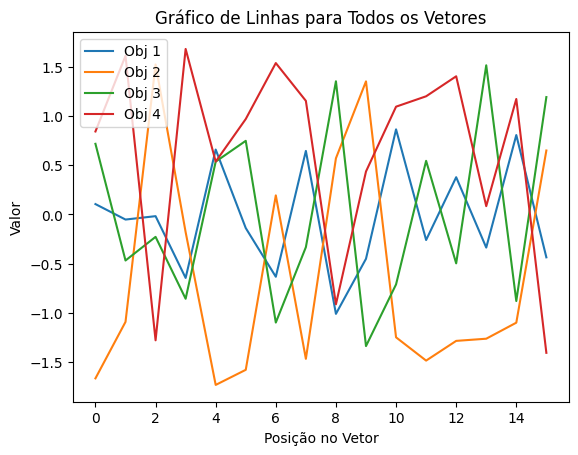

In [ ]:
# Cria um array de índices para representar as posições dos valores no vetor
indices = df2['PAIS']

# Cria um array de índices para representar as posições dos valores no vetor
indices = range(len(vetores_norm[0]))

# Crie o gráfico de linhas para cada vetor com rótulos de legenda
for i, vetor in enumerate(vetores_norm):
    plt.plot(indices, vetor, label=f'Obj {i + 1}')

# Configure os rótulos dos eixos
plt.xlabel('Posição no Vetor')
plt.ylabel('Valor')
plt.title('Gráfico de Linhas para Todos os Vetores')
plt.legend()

# Exiba o gráfico
plt.show()


Essa primeira versão ficou um pouco poluída e difícil de distinguir. No entanto, ainda podemos observar que o **Obj2** continua se destacando.

No gráfico a seguir iremos destaca apenas os 4 primeiros vetores.

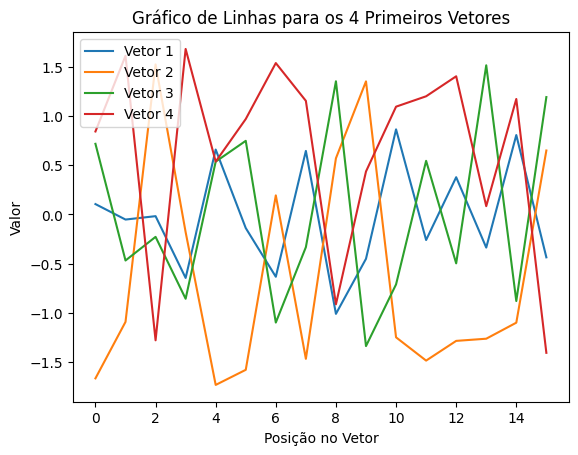

In [ ]:
num_vetores = 4  # Número de vetores que deseja incluir

for i, vetor in enumerate(vetores_norm[:num_vetores]):
    plt.plot(indices, vetor, label=f'Vetor {i + 1}')

# Configure os rótulos dos eixos
plt.xlabel('Posição no Vetor')
plt.ylabel('Valor')
plt.title('Gráfico de Linhas para os 4 Primeiros Vetores')
plt.legend()

# Exiba o gráfico
plt.show()

A seguir, iremos exibir 3 gráficos com uma representação de todos os vetores.

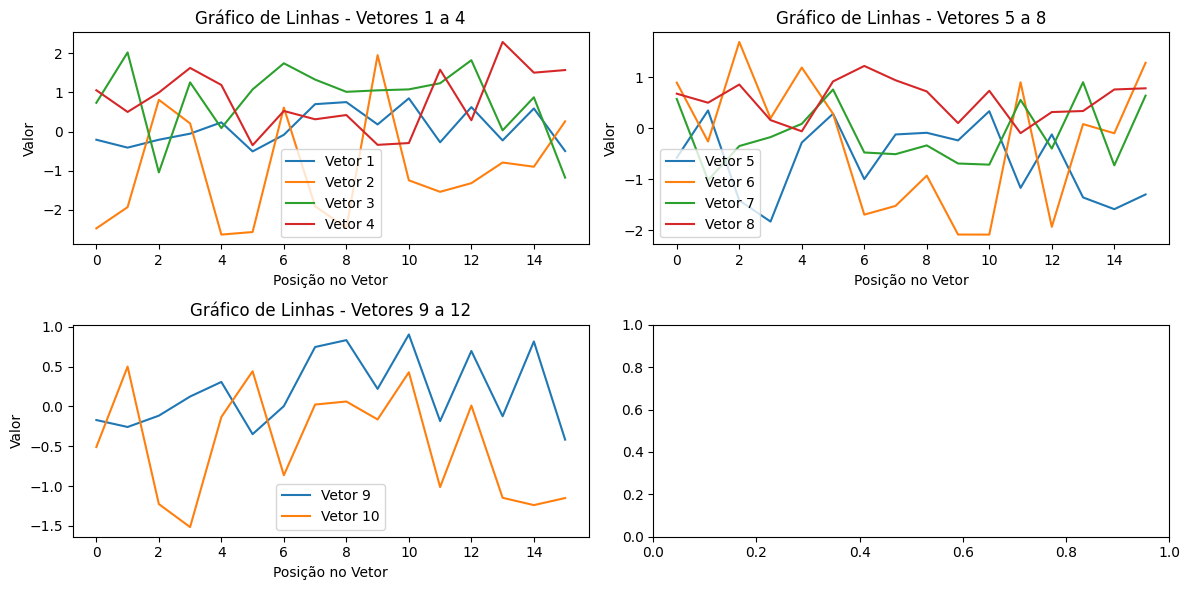

In [ ]:
# Cria um array de índices para representar as posições dos valores no vetor
indices = range(len(vetores_norm[0]))

# Número total de vetores
num_vetores = len(vetores_norm)

# Número de vetores por gráfico
num_vetores_por_grafico = 4

# Cria subplots com duas colunas (um para cada conjunto de 4 vetores)
fig, axs = plt.subplots(num_vetores // num_vetores_por_grafico, 2, figsize=(12, 6))

# Índice inicial
indice_inicial = 0

# Loop para criar os gráficos
for i in range(num_vetores // num_vetores_por_grafico):
    for j in range(2):
        if indice_inicial < num_vetores:
            for k, vetor in enumerate(vetores_norm[indice_inicial:indice_inicial + num_vetores_por_grafico]):
                axs[i, j].plot(indices, vetor, label=f'Vetor {indice_inicial + k + 1}')
            axs[i, j].set_xlabel('Posição no Vetor')
            axs[i, j].set_ylabel('Valor')
            axs[i, j].set_title(f'Gráfico de Linhas - Vetores {indice_inicial + 1} a {indice_inicial + num_vetores_por_grafico}')
            axs[i, j].legend()
            indice_inicial += num_vetores_por_grafico

# Ajuste o layout
plt.tight_layout()

# Exiba os gráficos
plt.show()


**Conclusão:**
Considerando que todos os vetores estão normalizados, podemos afirmar com maior convicção que o **Obj2** demonstra ser o mais divergente em relação aos demais. No entanto, é importante destacar que os **Objetos 3 e 6** também apresentam alguma tendência anômala.

**Scatterplot Normalizado**


Analisando apenas duas dimensões para visualizar a dispersão dos dados.

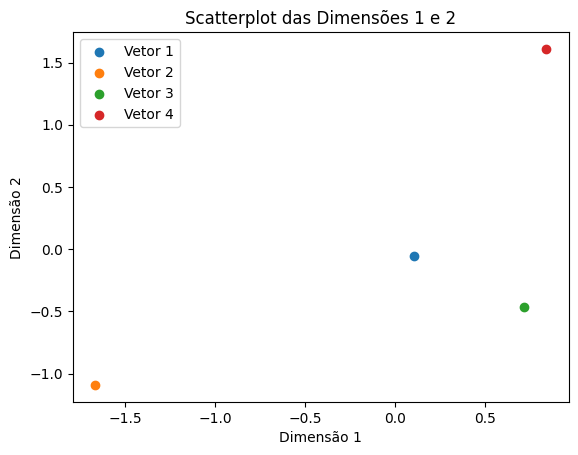

In [ ]:
# Escolha duas dimensões para o scatterplot (por exemplo, dimensão 1 e dimensão 2)
dimensao1 = 0  # Escolha a dimensão 1 (índice da coluna)
dimensao2 = 1  # Escolha a dimensão 2 (índice da coluna)

# Crie o scatterplot e adicione uma legenda
for i, vetor in enumerate(vetores_norm):
    plt.scatter(vetor[dimensao1], vetor[dimensao2], label=f'Vetor {i + 1}')

# Configure os rótulos dos eixos
plt.xlabel(f'Dimensão {dimensao1 + 1}')
plt.ylabel(f'Dimensão {dimensao2 + 1}')
plt.title(f'Scatterplot das Dimensões {dimensao1 + 1} e {dimensao2 + 1}')
# Adicione a legenda
plt.legend()

# Exiba o scatterplot
plt.show()

##Aplicando os cálculos de distância e dissimilaridade novamente
Para esta etapa faremos:


1.   Transformação das linhas do dataframe em vetores
2.   Utilizaremos a biblioteca SCIPY que contém os cálculos euclidean, chebyshev, minkowski, canberra, cosine.
3.   Adicionaremos a mão o cálculo de manhattan
4.   Calcularemos a distância média entre cada vetor para evidenciar o vetor com maior discrepância.

In [ ]:
from scipy.spatial.distance import euclidean, chebyshev, minkowski, canberra, cosine

# Calcular as distâncias médias para cada vetor usando diferentes métricas de distância
distancias_euclidiana = [np.mean([euclidean(v, w) for w in vetores_norm]) for v in vetores_norm]
distancias_manhattan = [np.mean([np.sum(np.abs(v - w)) for w in vetores_norm]) for v in vetores_norm]
distancias_chebyshev = [np.mean([chebyshev(v, w) for w in vetores_norm]) for v in vetores_norm]
distancias_minkowski = [np.mean([minkowski(v, w, 2) for w in vetores_norm]) for v in vetores_norm]
distancias_canberra = [np.mean([canberra(v, w) for w in vetores_norm]) for v in vetores_norm]
distancias_cosseno = [np.mean([1 - cosine(v, w) for w in vetores_norm]) for v in vetores_norm]

# Calcular a média das distâncias de cada métrica para cada vetor
distancias_medias = np.mean([distancias_euclidiana, distancias_manhattan, distancias_chebyshev,
                             distancias_minkowski, distancias_canberra, distancias_cosseno], axis=0)

# Encontra o vetor com a maior distância média
indice_maior_distancia = np.argmax(distancias_medias)

# Imprime o vetor com a maior distância média
vetor_maior_distancia = vetores_norm[indice_maior_distancia]
print("Vetor com a maior distância média em relação aos outros:")
print(vetor_maior_distancia)
# Imprime o Obj com maior chance de estar com defeito
obj = df2['PAIS'][indice_maior_distancia]
print("O objeto maior probabilidade de estar com defeito:")
print(obj)

Vetor com a maior distância média em relação aos outros:
[-1.66338402 -1.09026568  1.52210526 -0.17956522 -1.72988456 -1.57665641
  0.19360077 -1.4649667   0.56995453  1.35022682 -1.24700598 -1.48312126
 -1.28305378 -1.26099406 -1.09837804  0.64874072]
O objeto maior probabilidade de estar com defeito:
N IRELAND


**Conclusão:** Com base nas métricas apresentadas, o Obj2 continua a apresentar a maior probabilidade de estar defeituoso.

#Análise 2: PCA e Kmeans

##PCA - Análise dos componentes principais

O PCA (Principal Component Analysis) é uma técnica de análise de dados que reduz a dimensionalidade dos dados, mantendo o máximo de variabilidade possível. Ele identifica as direções principais ao longo das quais os dados variam e as utiliza para criar novas variáveis, chamadas de componentes principais, que são combinações lineares das variáveis originais.

In [ ]:
# Importa a função PCA da biblioteca sklearn
from sklearn.decomposition import PCA

pca = PCA()
X = pca.fit_transform(previsoresdf)

In [ ]:
# Calcula a variância explicada (explained variance) para cada componente principal
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.37763315e-01, 2.78831036e-01, 8.34056485e-02, 3.21389559e-33])

In [ ]:
# Calcula a soma cumulativa da razão da variância explicada.
# Cada valor nesta sequência indica quanto da variabilidade total nos dados é explicado por um componente principal específico.
pca.explained_variance_ratio_.cumsum()

array([0.63776332, 0.91659435, 1.        , 1.        ])

ValueError: ignored

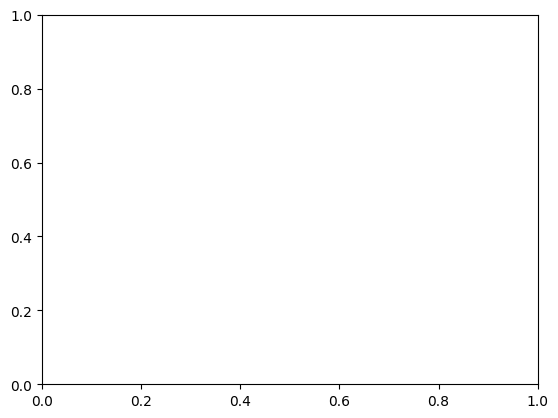

In [ ]:
# Verificando a variancia de forma gráfica
plt.plot(range(0,10), pca.explained_variance_ratio_.cumsum(),marker='o')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

Agora, devemos selecionar um número apropriado de componentes principais, considerando quanto da variância total desejamos reter. Geralmente, uma escolha comum é reter um número de componentes principais que explique, por exemplo, 95% ou 99% da variância total. No nosso caso, optamos por reter apenas 90% da variância total, o que corresponde a 3 componentes principais, para tornar a análise mais ágil.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X = pca.fit_transform(previsoresdf)
principalDf = pd.DataFrame(data = X
             , columns = ['principal component 1','principal component 2','principal component 3'])

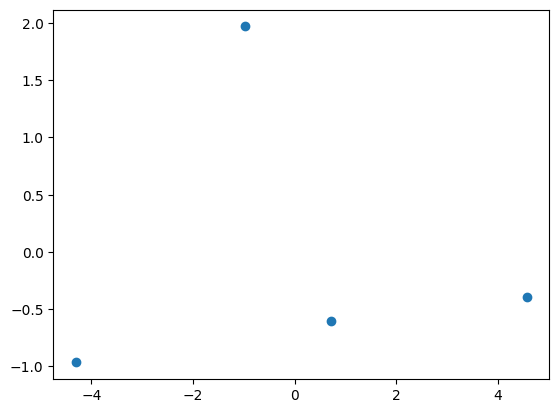

In [ ]:
# Verificando um scatterplot dos componentes principais
plt.scatter(principalDf['principal component 1'],principalDf['principal component 3'])

**Scatter 3D**

Utilizaremos o gráfico a seguir para visualizar os dados em 3 dimensões, aplicando uma codificação de cores aos pontos de acordo com os rótulos. Isso permitirá uma melhor compreensão de qual Objeto (Obj) está representado em cada ponto do gráfico.

In [ ]:
 #Scatter 3D
import plotly.express as px

z = principalDf ['principal component 1']
x = principalDf ['principal component 2']
y = principalDf ['principal component 3']

# Plotting the figure
fig = px.scatter_3d(principalDf, x,y,z,color=df2['PAIS'])

fig.show()

**Conclusão:** Mais uma vez, conseguimos destacar o Obj2 como um componente divergente. No entanto, também observamos que os objetos 4 e 6 se destacam como possíveis suspeitos.

Com os componentes principais à disposição, vamos aplicá-los a um algoritmo de clusterização para avaliar a similaridade entre cada Objeto.

##Kmeans

O K-means é um algoritmo de aprendizado de máquina não supervisionado utilizado para agrupar dados em clusters, onde cada cluster é representado por seu centroide, de forma que os pontos de dados em um mesmo cluster sejam mais similares entre si do que com os pontos de outros clusters.

In [ ]:
# Importa a função KMeans da biblioteca  sklearn
from sklearn.cluster import KMeans

# Cria uma lista vazia para armazenar os valores de inécia para os diferentes números de clusters
clusters = []

# Inicia um loop de 1 a 10 (ou seja, tentará encontrar o número ideal de clusters de 1 a 10).
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(principalDf)
    clusters.append(km.inertia_)

# Cria o gráfico de Elbow, também conhecido como gráfico do cotovelo
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, marker = 'o',ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



ValueError: ignored

Com base no gráfico de Elbor, conseguimos dentificar o ponto onde a curva começa a se estabilizar (Cotovelo), geralmente considerado como o número ideal de clusters. No caso do nosso estudo seria algo entre 4 clusters.

In [ ]:
#  Cria uma instância do modelo K-means com a especificação de que você deseja dividir, no caso 4 clusters.
Kmeans_PCA = KMeans(n_clusters=4)
# Ajusta (ou treina) o modelo K-means com os dados presente em  principalDf
Kmeans_PCA.fit(principalDf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [ ]:
# Exibe as informações de rótulo de cluster atribuídas a cada ponto de dados
Kmeans_PCA.labels_

array([1, 3, 1, 1, 0, 2, 2, 1, 1, 0], dtype=int32)

In [ ]:
# Fornece as coordenadas dos centros dos clusters
Kmeans_PCA.cluster_centers_

array([[-1.41186386e+00,  5.42399204e-01,  7.60018938e-02,
        -9.23038101e-02, -1.60309920e-02,  8.87319329e-03,
        -1.06341978e-01, -1.96363070e-03],
       [ 3.29434901e+00, -1.26559814e+00, -1.77337752e-01,
         2.15375557e-01,  3.74056480e-02, -2.07041177e-02,
         2.48131281e-01,  4.58180496e-03]])

In [ ]:
# Cria uma coluna para armazenar os segmentos
principalDf['Segment'] = Kmeans_PCA.labels_

In [ ]:
# Cria uma coluna para armazenar os rótulos de OBJ
principalDf['Obj'] = df2['Obj']

In [ ]:
# Verifica as colunas
principalDf.columns

Index(['principal component 1', 'principal component 2',
       'principal component 3', 'Segment', 'Obj'],
      dtype='object')

In [ ]:
# Contando os segmentos
principalDf['Segment'].value_counts()

0    5
3    2
2    2
1    1
Name: Segment, dtype: int64

In [ ]:
# Procura o cluster 1 no dataframe
principalDf.loc[principalDf.Segment == 1]

,principal component 1,principal component 2,principal component 3,Segment,Obj
1,5.811211,0.149444,3.319968,1,Obj2


**Conclusão:**
Aqui, observamos que o cluster 1 contém apenas um item, o que indica que esse objeto é o mais divergente entre os 10 avaliados neste estudo. Mais uma vez, o Obj2 se destaca como o mais divergente.

### Análise Gráfica

**Scatterplot**

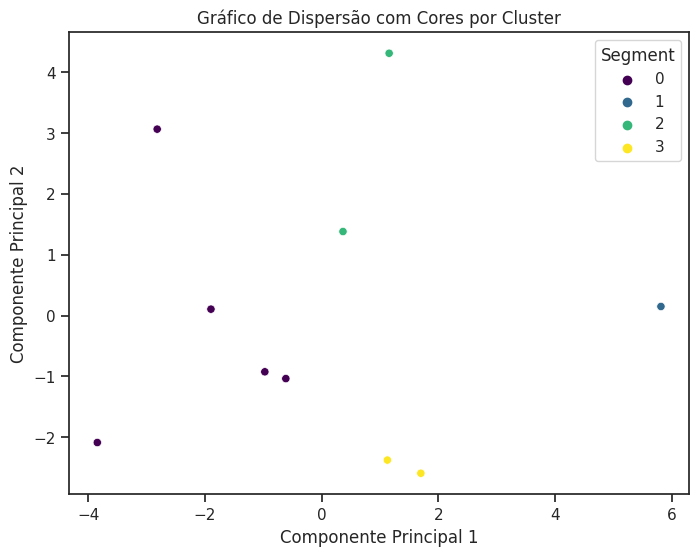

In [ ]:
# Plota o gráfico de dispersão colorindo os pontos de acordo com os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='Segment', palette='viridis')

plt.title('Gráfico de Dispersão com Cores por Cluster')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

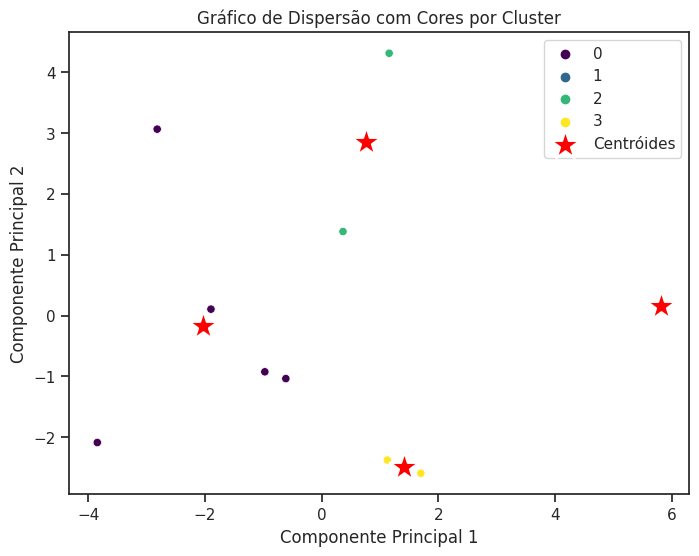

In [ ]:
# Plote o gráfico de dispersão colorindo os pontos de acordo com os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='Segment', palette='viridis')

# Adiciona os centróides ao gráfico
sns.scatterplot(x=Kmeans_PCA.cluster_centers_[:, 0], y=Kmeans_PCA.cluster_centers_[:, 1],
                s=500, color='red', marker='*', label='Centróides')
plt.title('Gráfico de Dispersão com Cores por Cluster')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

**Scatter 3D**

In [ ]:
z = principalDf['principal component 1']
x = principalDf['principal component 2']
y = principalDf['principal component 3']

segment = principalDf['Segment']
component_id = principalDf['Obj']

# Criando um DataFrame para os rótulos de texto
labels_df = pd.DataFrame({'x': x, 'y': y, 'z': z, 'Segment': segment, 'Obj': component_id})

# Plotting the figure
fig = px.scatter_3d(labels_df, x='x', y='y', z='z', color='Segment', text='Obj', title='Gráfico 3D de Dispersão com IDs dos Componentes')

# Ajuste as configurações de rótulos de texto
fig.update_traces(textposition='top center', textfont_size=12)

# Exibindo o gráfico
fig.show()


#Conclusão

Tanto a abordagem mais simples apresentada na análise 1 quanto a abordagem mais robusta na análise 2 apontam consistentemente para o OBJ2 como o possível objeto defeituoso.

#Referências

[1] Diogo Inácio. Métricas de distância e dissimilaridade. Disponível em:
https://diegoinacio.medium.com/metricas-de-distancia-e-dissimilaridade-94f9d8d962d4

Acesso em : 30/09/2023

[2] W-School. Machine Learning - Scatter Plot. Disponível em:
https://www.w3schools.com/python/python_ml_scatterplot.asp

Acesso em : 30/09/2023

[3] Bruno Anastácio. K-means: o que é, como funciona, aplicações e exemplo em Python. Disponível em:

https://medium.com/programadores-ajudando-programadores/k-means-o-que-%C3%A9-como-funciona-aplica%C3%A7%C3%B5es-e-exemplo-em-python-6021df6e2572#:~:text=K%2DMeans%20%C3%A9%20um%20algoritmo,lojas%2Fcentro%20logistico

Acesso em: 01/10/2023